In [6]:
import pandas as pd

In [29]:
train=pd.read_csv('sales_train.csv')

In [30]:
test=pd.read_csv('test.csv')
import matplotlib.pyplot as plt

In [31]:
sample_submission=pd.read_csv('sample_submission.csv')

In [32]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [33]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [34]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [35]:
train.shape

(2935849, 6)

In [36]:
test.shape

(214200, 3)

In [37]:
sample_submission.shape

(214200, 2)

In [38]:
import missingno

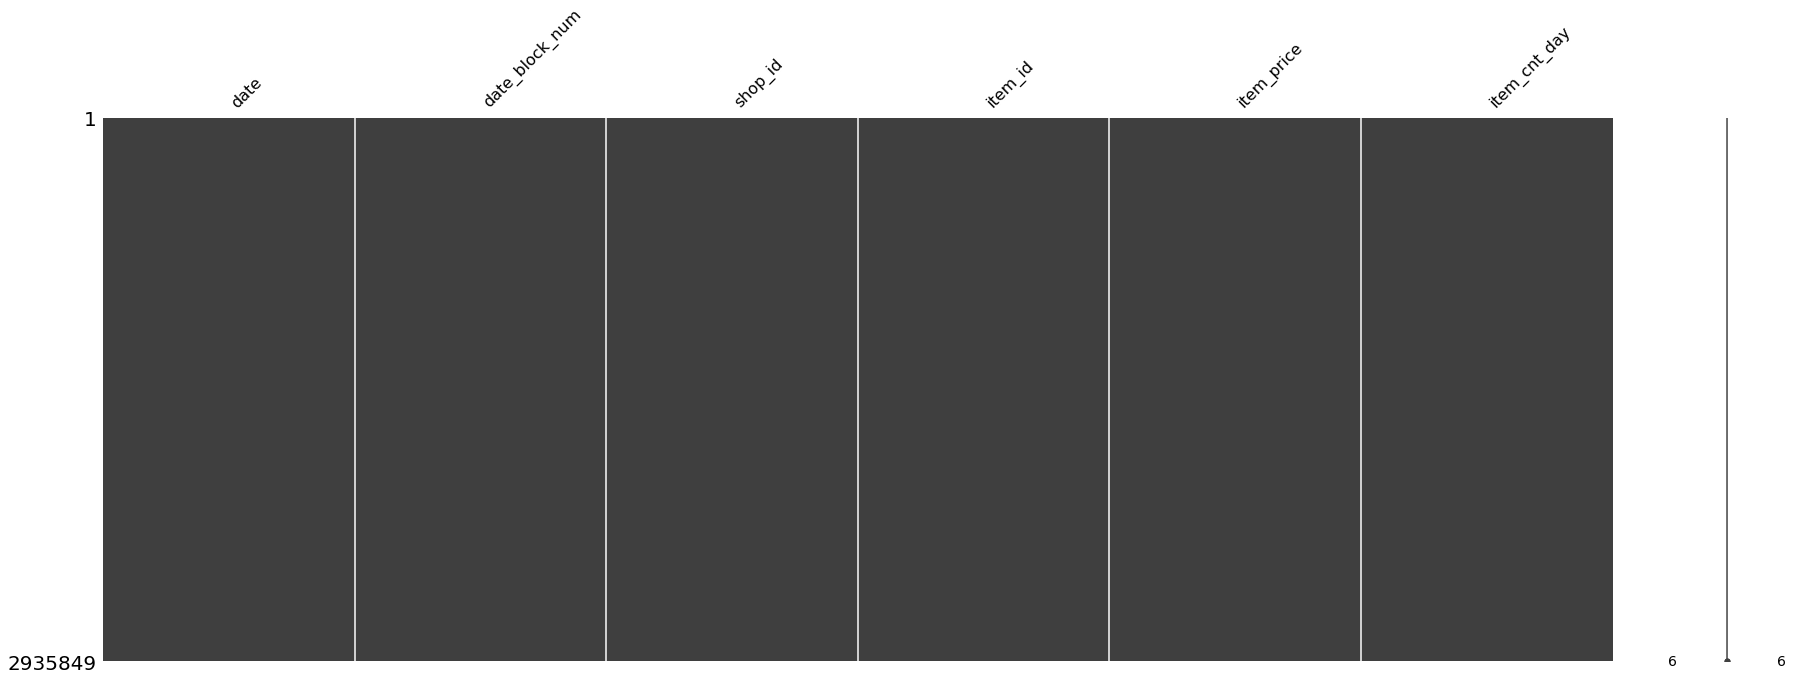

In [39]:
missingno.matrix(train,figsize=(30,10))

In [38]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [44]:
mean1=train['item_cnt_day'].mean()

In [41]:
median=train['item_cnt_day'].median()

In [42]:
print(median)

1.0


In [46]:
print(mean1)

1.242640885140891


In [50]:
print (train[train.item_cnt_day == '-1'].count())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [40]:
train.groupby('item_cnt_day').size()

item_cnt_day
-22.0            1
-16.0            1
-9.0             1
-6.0             2
-5.0             4
-4.0             3
-3.0            14
-2.0            78
-1.0          7252
 1.0       2629372
 2.0        194201
 3.0         47350
 4.0         19685
 5.0         10474
 6.0          6338
 7.0          4057
 8.0          2903
 9.0          2177
 10.0         1820
 11.0         1263
 12.0         1083
 13.0          918
 14.0          716
 15.0          638
 16.0          544
 17.0          438
 18.0          391
 19.0          347
 20.0          364
 21.0          290
            ...   
 230.0           1
 231.0           1
 240.0           1
 242.0           1
 251.0           1
 255.0           1
 264.0           1
 288.0           1
 299.0           1
 300.0           1
 313.0           2
 325.0           1
 343.0           1
 401.0           2
 405.0           1
 412.0           1
 480.0           1
 500.0           2
 501.0           1
 502.0           1
 504.0           1

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [56]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [41]:
train.groupby('item_id').size()

item_id
0           1
1           6
2           2
3           2
4           1
5           1
6           1
7           1
8           2
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27         42
28         86
29         14
         ... 
22140     290
22141      48
22142      10
22143     647
22144     112
22145     286
22146      29
22147      63
22148       2
22149      35
22150      58
22151     283
22152      84
22153       9
22154      59
22155      75
22156       4
22157       4
22158       1
22159      14
22160      49
22161       1
22162     560
22163      71
22164     408
22165       2
22166     270
22167    1114
22168       6
22169       1
Length: 21807, dtype: int64

In [65]:
import seaborn as sns

<Figure size 2160x1440 with 0 Axes>

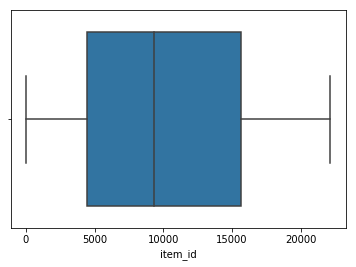

<Figure size 2160x1440 with 0 Axes>

In [106]:
sns.boxplot(x=train['item_id'] )
plt.figure(figsize=(30,20))

In [113]:
train.groupby('item_price').size()

item_price
-1.000000            1
 0.070000            2
 0.087500            1
 0.090000            1
 0.100000         2932
 0.200000            1
 0.500000         1226
 0.908714            1
 0.990000          493
 1.000000            1
 1.830000           11
 2.000000           11
 2.990000            1
 3.000000         1234
 3.570000            3
 3.590000            2
 3.640000            2
 3.670000            1
 3.690000            2
 3.710000            3
 3.720000            6
 3.800000            2
 4.000000          105
 4.029126            1
 4.055556            1
 4.142857            1
 4.235294            1
 4.300000            1
 4.333333            1
 4.400000            1
                  ... 
 31599.000000        1
 31699.000000        1
 31990.000000       19
 32092.000000        1
 32199.000000       16
 32382.000000        1
 32437.000000        1
 32490.000000        4
 32990.000000       57
 32997.500000        1
 33490.000000        8
 33990.000000        1


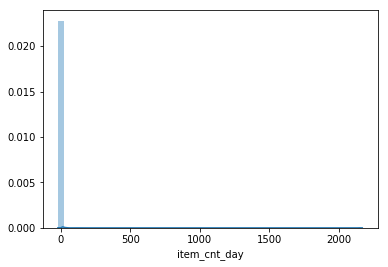

In [109]:
sns.distplot(train.item_cnt_day)

<Figure size 2160x1440 with 0 Axes>

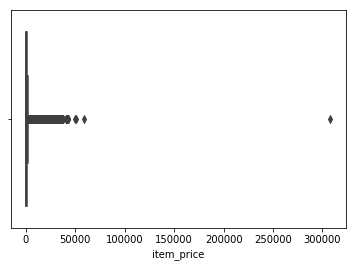

<Figure size 2160x1440 with 0 Axes>

In [43]:
import seaborn as sns
sns.boxplot(x=train['item_price'] )
plt.figure(figsize=(30,20))

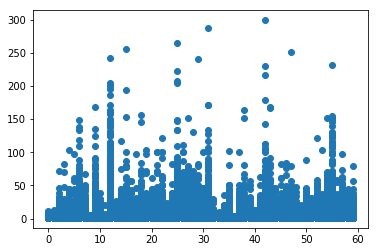

In [191]:
plt.scatter(train['shop_id'],train['item_cnt_day'])

In [130]:
train.groupby(['date']).size()

date
01.01.2013    1669
01.01.2014    1852
01.01.2015    1673
01.02.2013    3356
01.02.2014    4691
01.02.2015    2925
01.03.2013    3491
01.03.2014    4554
01.03.2015    2825
01.04.2013    2338
01.04.2014    1851
01.04.2015    1515
01.05.2013    4255
01.05.2014    3133
01.05.2015    2359
01.06.2013    4581
01.06.2014    3576
01.06.2015    1670
01.07.2013    2930
01.07.2014    2254
01.07.2015    1642
01.08.2013    2821
01.08.2014    2507
01.08.2015    1771
01.09.2013    4267
01.09.2014    2482
01.09.2015    2265
01.10.2013    2252
01.10.2014    2007
01.10.2015    1595
              ... 
30.09.2013    2234
30.09.2014    1927
30.09.2015    1252
30.10.2013    2685
30.10.2014    1988
30.10.2015    1938
30.11.2013    4809
30.11.2014    3498
30.12.2013    9138
30.12.2014    9324
31.01.2013    2728
31.01.2014    3097
31.01.2015    3536
31.03.2013    4651
31.03.2014    1955
31.03.2015    1433
31.05.2013    3332
31.05.2014    4152
31.05.2015    2014
31.07.2013    2976
31.07.2014    2271
31.07.2

In [79]:
train.groupby('item_cnt_day').size()

item_cnt_day
1.0      2629372
2.0       194201
3.0        47350
4.0        19685
5.0        10474
6.0         6338
7.0         4057
8.0         2903
9.0         2177
10.0        1820
11.0        1263
12.0        1083
13.0         918
14.0         716
15.0         638
16.0         544
17.0         438
18.0         391
19.0         347
20.0         364
21.0         290
22.0         242
23.0         198
24.0         204
25.0         180
26.0         176
27.0         130
28.0         131
29.0         102
30.0         147
          ...   
150.0          2
151.0          5
153.0          1
154.0          1
156.0          1
157.0          1
161.0          1
163.0          1
164.0          1
167.0          1
168.0          2
171.0          3
179.0          1
187.0          1
194.0          1
195.0          1
200.0          1
205.0          2
207.0          1
217.0          1
222.0          1
230.0          1
231.0          1
240.0          1
242.0          1
251.0          1
255.0          1
2

In [77]:
i = train[train.item_cnt_day == 2169 ].index
train.drop(i  , inplace=True)

In [78]:
train.shape

(2928469, 6)

In [193]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [80]:
test['date_block_num']=34

In [83]:
test.drop('date_block_num',axis=1,inplace= True)

In [84]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [22]:
test.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [200]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [201]:
test2=test

In [202]:
test2.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [88]:
test.drop('date_block_num3',axis=1,inplace=True)


In [89]:
test.insert( 1,'date_block_num', 35)
test.head()

,ID,date_block_num,shop_id,item_id
0,0,35,5,5037
1,1,35,5,5320
2,2,35,5,5233
3,3,35,5,5232
4,4,35,5,5268


In [209]:
test2.head()

,ID,date_block_num3,shop_id,date_block_num2,item_id,date_block_num
0,0,35,5,35,5037,34
1,1,35,5,35,5320,34
2,2,35,5,35,5233,34
3,3,35,5,35,5232,34
4,4,35,5,35,5268,34


In [217]:
test2.drop('date_block_num',axis=1,inplace=True)

In [220]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [224]:
test.insert( 1,'date_block_num', 35)

In [225]:
test.head()

,ID,date_block_num,shop_id,item_id
0,0,35,5,5037
1,1,35,5,5320
2,2,35,5,5233
3,3,35,5,5232
4,4,35,5,5268


In [226]:
test3=test

In [227]:
test3.head()

,ID,date_block_num,shop_id,item_id
0,0,35,5,5037
1,1,35,5,5320
2,2,35,5,5233
3,3,35,5,5232
4,4,35,5,5268


In [228]:
test.head()

,ID,date_block_num,shop_id,item_id
0,0,35,5,5037
1,1,35,5,5320
2,2,35,5,5233
3,3,35,5,5232
4,4,35,5,5268


In [229]:
test.head(10)

,ID,date_block_num,shop_id,item_id
0,0,35,5,5037
1,1,35,5,5320
2,2,35,5,5233
3,3,35,5,5232
4,4,35,5,5268
5,5,35,5,5039
6,6,35,5,5041
7,7,35,5,5046
8,8,35,5,5319
9,9,35,5,5003


In [90]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0
10,03.01.2013,0,25,2574,399.00,2.0


In [91]:
train2=train

In [92]:
train2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [93]:
train.to_csv('kagglepredictionmodifytrainset.csv')

In [94]:
test.to_csv('kagglepredictionmodifytestset.csv')

In [95]:
import numpy as np
y = np.array(train2['item_cnt_day'])


In [96]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [245]:
train2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [246]:
train3=train2

In [247]:
train3.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [248]:
import numpy as np

In [250]:
y = np.array(train2['item_cnt_day'])

In [252]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [269]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [104]:
train2

In [105]:
train=pd.read_csv('kagglepredictionmodifytrainset.csv')

In [106]:
train.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,02.01.2013,0,59,22154,999.00,1.0
1,1,03.01.2013,0,25,2552,899.00,1.0
2,3,06.01.2013,0,25,2554,1709.05,1.0
3,4,15.01.2013,0,25,2555,1099.00,1.0
4,5,10.01.2013,0,25,2564,349.00,1.0


In [108]:
train.drop('Unnamed: 0',axis=1,inplace=True)


In [109]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,06.01.2013,0,25,2554,1709.05,1.0
3,15.01.2013,0,25,2555,1099.00,1.0
4,10.01.2013,0,25,2564,349.00,1.0


In [110]:
train3=train

In [111]:
train3.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,06.01.2013,0,25,2554,1709.05,1.0
3,15.01.2013,0,25,2555,1099.00,1.0
4,10.01.2013,0,25,2564,349.00,1.0


In [112]:
y = np.array(train3['item_cnt_day'])

In [113]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [114]:
X= train3.drop('item_cnt_day', axis = 1,inplace=True)

In [115]:
X= train3.drop('date', axis = 1,inplace=True)

In [144]:
X= train3.drop('item_price', axis = 1,inplace=True)

In [206]:
X= train3.drop('date_block_num', axis = 1,inplace=True)

In [207]:
feature_list = list(train3.columns)

In [208]:
feature_list

['shop_id', 'item_id']

In [209]:
X = np.array(train3)

In [210]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [211]:
X

array([[   59, 22154],
       [   25,  2552],
       [   25,  2554],
       ...,
       [   25,  7459],
       [   25,  7440],
       [   25,  7460]], dtype=int64)

In [212]:
train3.dtypes

shop_id    int64
item_id    int64
dtype: object

In [214]:
train3.head()

,shop_id,item_id
0,59,22154
1,25,2552
2,25,2554
3,25,2555
4,25,2564


In [100]:
y = np.array(train3['item_cnt_day'])
X= train3.drop('item_cnt_day', axis = 1,inplace=True)
feature_list = list(train3.columns)
X = np.array(X)

In [205]:
X

array([[    0,    59, 22154],
       [    0,    25,  2552],
       [    0,    25,  2554],
       ...,
       [   33,    25,  7459],
       [   33,    25,  7440],
       [   33,    25,  7460]], dtype=int64)

In [ ]:
X= train3.drop('item_cnt_day', axis = 1,inplace=True)

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
model = RandomForestRegressor(n_estimators = 30, random_state = 42)

In [ ]:
model.fit(X,y)

In [218]:
X

array([[   59, 22154],
       [   25,  2552],
       [   25,  2554],
       ...,
       [   25,  7459],
       [   25,  7440],
       [   25,  7460]], dtype=int64)

In [135]:
test2=test.copy()

In [136]:
test2.head()

,ID,date_block_num,shop_id,item_id
0,0,35,5,5037
1,1,35,5,5320
2,2,35,5,5233
3,3,35,5,5232
4,4,35,5,5268


In [137]:
X2= test2.drop('ID', axis = 1,inplace=True)

In [139]:
test2.head()

,date_block_num,shop_id,item_id
0,35,5,5037
1,35,5,5320
2,35,5,5233
3,35,5,5232
4,35,5,5268


In [140]:
feature_list2 = list(test2.columns)
X2 = np.array(test2)

In [152]:
X2

array([[   35,     5,  5037],
       [   35,     5,  5320],
       [   35,     5,  5233],
       ...,
       [   35,    45, 15757],
       [   35,    45, 19648],
       [   35,    45,   969]], dtype=int64)

In [153]:
predictions = model.predict(X2)


In [154]:
predictions

array([1.   , 1.   , 1.   , ..., 1.   , 1.025, 1.   ])

In [161]:
predictions2 = [round(x) for x in predictions]

In [190]:
submissions=pd.DataFrame()
submissions['item_cnt_day']=predictions
submissions.groupby('item_cnt_day').size()

item_cnt_day
1.000000     160100
1.001754          1
1.001852          1
1.002083          1
1.002222          6
1.002381          2
1.002564         13
1.002778          4
1.003030         37
1.003143          1
1.003333         60
1.003509          1
1.003704         46
1.004167        161
1.004342          1
1.004444          5
1.004762        230
1.005128         10
1.005556        225
1.006061         75
1.006250          1
1.006364          2
1.006667        495
1.006734          1
1.006984          1
1.007143          8
1.007407         54
1.007509          1
1.007692          1
1.007792          2
              ...  
10.900000         2
11.163444         1
11.242945         1
12.600000        15
13.000000         1
13.211111         1
13.566667        19
14.053949         1
14.511244         1
15.162524         1
15.200000         1
15.500000         1
15.844444         1
15.921280         2
15.954613         5
16.120000         1
16.334365         1
16.401032         1
16.4666

In [191]:
submissions.head()

,item_cnt_day
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [192]:
submissions['ID']=test['ID']

In [193]:
submissions.head()

,item_cnt_day,ID
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4


In [194]:
submissions['ID2']=submissions['item_cnt_day']

In [195]:
submissions.drop('item_cnt_day',axis=1,inplace=True)

In [196]:
submissions.head()

,ID,ID2
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [197]:
submissions.rename({'ID2': 'item_cnt_day'}, axis=1, inplace=True)

In [198]:
submissions.head()

,ID,item_cnt_day
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [199]:
submissions.shape

(214200, 2)

In [200]:
submissions.rename({'item_cnt_day': 'item_cnt_month'}, axis=1, inplace=True)

In [201]:
submissions.head()

,ID,item_cnt_month
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [204]:
submissions.to_csv('final_submission3.csv',index=False)

In [202]:
model.score(X2,predictions)

1.0

In [184]:
khan=pd.read_csv('final_submission.csv')

In [185]:
khan.head()

,Unnamed: 0,ID,item_cnt_month
0,0,0,1.0
1,1,1,1.0
2,2,2,1.0
3,3,3,1.0
4,4,4,1.0


In [187]:
submissions.to_csv('final_submission2.csv' , index=False)

In [188]:
khan2=pd.read_csv('final_submission2.csv')

In [189]:
khan2.head()

,ID,item_cnt_month
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [156]:
predictions

array([1.   , 1.   , 1.   , ..., 1.   , 1.025, 1.   ])

In [143]:
train.head()

,date_block_num,shop_id,item_id,item_price
0,0,59,22154,999.00
1,0,25,2552,899.00
2,0,25,2554,1709.05
3,0,25,2555,1099.00
4,0,25,2564,349.00


In [125]:
test.head()

,ID,date_block_num,shop_id,item_id
0,0,35,5,5037
1,1,35,5,5320
2,2,35,5,5233
3,3,35,5,5232
4,4,35,5,5268


In [273]:
feature_list

['date_block_num', 'shop_id', 'item_id', 'item_price']

In [274]:
X = np.array(train2)

In [275]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [276]:
X

array([[    0.  ,    59.  , 22154.  ,   999.  ],
       [    0.  ,    25.  ,  2552.  ,   899.  ],
       [    0.  ,    25.  ,  2554.  ,  1709.05],
       ...,
       [   33.  ,    25.  ,  7459.  ,   349.  ],
       [   33.  ,    25.  ,  7440.  ,   299.  ],
       [   33.  ,    25.  ,  7460.  ,   299.  ]])

In [277]:
from sklearn.ensemble import RandomForestRegressor

In [278]:
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)